In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mnist

%matplotlib inline

Using TensorFlow backend.


In [2]:
from keras import datasets

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
from keras.utils import to_categorical

X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

X_train = X_train / 255
X_test = X_test / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
model = mnist.build_model()

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 4, 4, 64)          256       
__________

In [0]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint('weights.hdf5', save_best_only=True, verbose=1)

In [7]:
training = model.fit(X_train, y_train, batch_size=32, epochs=10,
                     validation_data=(X_test, y_test), callbacks=[checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 30s 503us/step - loss: 0.0596 - acc: 0.9793 - val_loss: 0.0127 - val_acc: 0.9956

Epoch 00001: val_loss improved from inf to 0.01266, saving model to weights.hdf5
Epoch 2/10
60000/60000 [==============================] - 27s 445us/step - loss: 0.0235 - acc: 0.9921 - val_loss: 0.0098 - val_acc: 0.9968

Epoch 00002: val_loss improved from 0.01266 to 0.00978, saving model to weights.hdf5
Epoch 3/10
60000/60000 [==============================] - 27s 444us/step - loss: 0.0196 - acc: 0.9936 - val_loss: 0.0079 - val_acc: 0.9977

Epoch 00003: val_loss improved from 0.00978 to 0.00786, saving model to weights.hdf5
Epoch 4/10
60000/60000 [==============================] - 27s 445us/step - loss: 0.0173 - acc: 0.9944 - val_loss: 0.0066 - val_acc: 0.9979

Epoch 00004: val_loss improved from 0.00786 to 0.00657, saving model to weights.hdf5
Epoch 5/10
60000/60000 [==============================

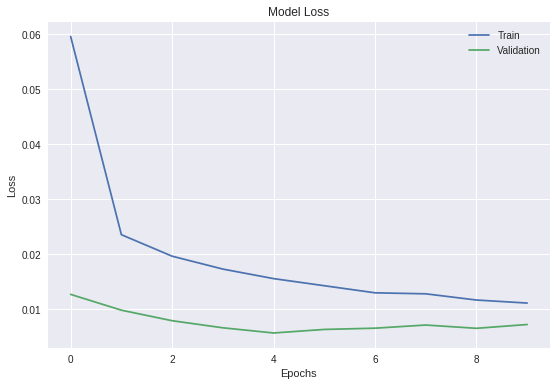

In [8]:
plt.figure(figsize=(9,6))
plt.plot(training.history['loss'], label='Train')
plt.plot(training.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

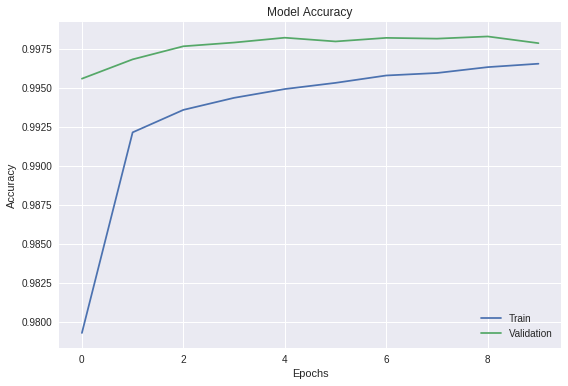

In [9]:
plt.figure(figsize=(9,6))
plt.plot(training.history['acc'], label='Train')
plt.plot(training.history['val_acc'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()